`torchvision` is the base library for vision on torch.<br>
- `torchvision.datasets` contains the datasets as well as data loading functions useful for vision tasks.<br>
- `torchvision.models` contains pre-trained models that can be used for transfer learning.<br>
- `torchvision.transforms` contains functions to manipulate vision data (images) to be suitable for usage with an ML model.<br><br>

`torch.utils.data` is the base library for datasets on torch.<br>
- `torch.utils.data.Dataset` is the base class for dataset in torch.<br>
- `torch.utils.data.DataLoader` creates a Python iterable over a dataset.<br>

In [2]:
import torch, torchvision
torch.__version__, torchvision.__version__

('2.0.0+cu118', '0.15.1+cu118')

In [3]:
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

#### Getting torchvision dataset
torchvision provides some datasets that we can import to train our models. Here, we will use FashionMNIST dataset for demonstration.

In [4]:
train_data = torchvision.datasets.FashionMNIST(root="data",
                                               train=True, # download only training dataset
                                               download=True,
                                               transform=torchvision.transforms.ToTensor(),
                                               target_transform=None)

test_data = torchvision.datasets.FashionMNIST(root="data",
                                               train=False, # download only test dataset
                                               download=True,
                                               transform=torchvision.transforms.ToTensor(),
                                               target_transform=None)

PyTorch domain libraries provide a number of pre-loaded datasets (such as FashionMNIST) that subclass `torch.utils.data.Dataset`.

In [6]:
type(train_data)

torchvision.datasets.mnist.FashionMNIST

#### Assessing the downloaded dataset.
The default images in `torchvision.datasets` are of the format H x W x C. However, since we passed `torchvision.transforms.ToTensor()` argument while downloading the data from `torchvision.datasets`, the images were transformed from the default shape of  H x W x C to C x H x W.

In [19]:
first_image, first_targe_label = train_data[0]
first_image.shape, first_targe_label

(torch.Size([1, 28, 28]), 9)

In [25]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [21]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

It appears that the first image is of an ankle boot i.e., label 9.

In [18]:
len(train_data), len(test_data)

(60000, 10000)

#### Visualizing the torchvision dataset image

(-0.5, 27.5, 27.5, -0.5)

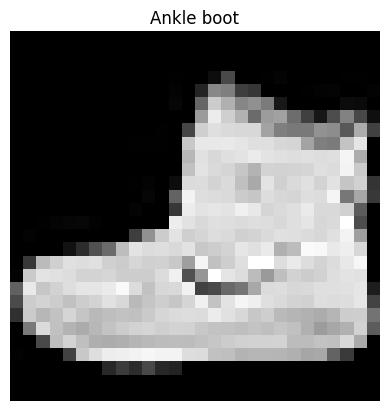

In [28]:
image, label = train_data[0]
# matplotlib.pyplot expects the input image to be of shape either HxWxC or HxC.
# hence, removing the single dimension using torch.squeeze()
# also matplotlib displays images using pseudocolor even if they are grayscale
# show the image in true grayscale
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[first_targe_label])
plt.axis(False)

Plot some more samples in a grid.

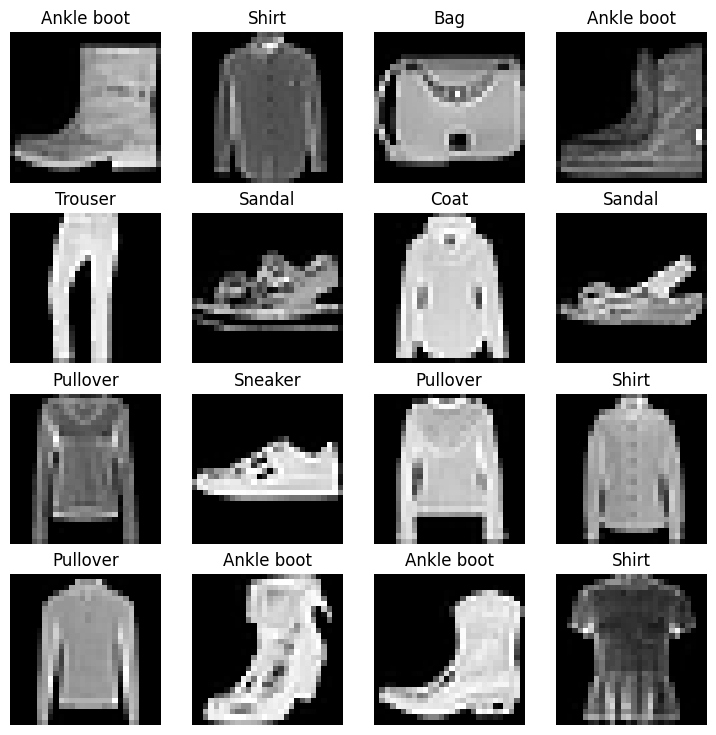

In [31]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for pos in range(1, (rows * cols + 1)):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, pos)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)